In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x

In [34]:
torch.manual_seed(32)
model=Model()

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df=pd.read_csv('Data/iris.csv')

In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [38]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [39]:
X=df.drop('target',axis=1).values
y=df['target'].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [42]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [43]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [44]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [45]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [46]:
epochs=100
losses=[]
for i in range(epochs):
    y_pred=model.forward(X_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss)
    if i % 10 == 0:
        print(f'Epoch:{i}, Loss:{loss:.5f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0, Loss:1.15071
Epoch:10, Loss:0.93773
Epoch:20, Loss:0.77983
Epoch:30, Loss:0.60997
Epoch:40, Loss:0.40084
Epoch:50, Loss:0.25437
Epoch:60, Loss:0.15052
Epoch:70, Loss:0.10086
Epoch:80, Loss:0.08128
Epoch:90, Loss:0.07231


Text(0.5, 0, 'EPOCH')

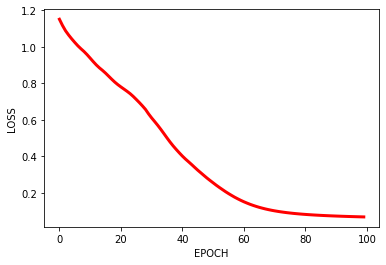

In [47]:
plt.plot(range(epochs),losses,'r',lw=3)
plt.ylabel('LOSS')
plt.xlabel('EPOCH')

In [48]:
with torch.no_grad():
    y_eval=model(X_test)
    loss=criterion(y_eval,y_test)

In [49]:
loss

tensor(0.0581)

In [50]:
correct=0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val=model(data)
        print(f'{i+1}.) \t {str(y_val)} \t {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'We got {correct} from {X_test.size()[0]} correct!')

1.) 	 tensor([-2.1245,  4.8073, -0.8623]) 	 1
2.) 	 tensor([-1.7976,  5.3110, -1.5445]) 	 1
3.) 	 tensor([  6.3540,   0.8432, -10.0531]) 	 0
4.) 	 tensor([-3.9114,  4.5969,  1.1698]) 	 1
5.) 	 tensor([-7.4707,  3.2028,  5.7865]) 	 2
6.) 	 tensor([-10.4965,   1.6465,   9.6306]) 	 2
7.) 	 tensor([  6.3199,   0.9912, -10.1520]) 	 0
8.) 	 tensor([  7.0467,   0.7053, -10.9127]) 	 0
9.) 	 tensor([-7.2053,  3.3485,  5.3575]) 	 2
10.) 	 tensor([-9.3950,  2.5767,  8.1044]) 	 2
11.) 	 tensor([-9.8795,  2.3483,  8.7148]) 	 2
12.) 	 tensor([ 6.2747,  0.6650, -9.7604]) 	 0
13.) 	 tensor([-9.3131,  2.1888,  8.1954]) 	 2
14.) 	 tensor([-3.7796,  4.5061,  1.0759]) 	 1
15.) 	 tensor([-7.8646,  3.0127,  6.2310]) 	 2
16.) 	 tensor([-1.8859,  5.1583, -1.3341]) 	 1
17.) 	 tensor([-5.6999,  3.5039,  3.6704]) 	 2
18.) 	 tensor([  7.1788,   0.7363, -11.1340]) 	 0
19.) 	 tensor([-3.2937,  4.7942,  0.3480]) 	 1
20.) 	 tensor([-7.7657,  3.7639,  5.7106]) 	 2
21.) 	 tensor([  6.6498,   0.7883, -10.4241]) 	 0
22.)

In [51]:
torch.save(model.state_dict(),'iris_model.pt')

In [52]:
new_model=Model()

In [53]:
new_model.load_state_dict(torch.load('iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [55]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [56]:
mystery_iris=torch.tensor([5.6,3.7,2.2,.5])

In [57]:
with torch.no_grad():
    mys_pred=new_model(mystery_iris)
    print(mys_pred.argmax())

tensor(0)
